# **Introduction to Dask**

Dask is a **parallel computing library** in Python that helps handle large datasets and perform computations efficiently by leveraging multi-core CPUs and distributed clusters. It integrates seamlessly with popular libraries like **Pandas**, **NumPy**, and **Scikit-learn**, providing scalable solutions for data analysis and machine learning.

---

## **Key Features of Dask**
1. **Parallel Computing**: Enables computations to be executed on multiple cores or distributed systems.
2. **Lazy Evaluation**: Constructs task graphs that are only executed when needed, saving memory and improving efficiency.
3. **Seamless Integration**: Works with tools like Pandas, NumPy, Scikit-learn, and others to scale workflows.
4. **Data Scaling**: Handles datasets that are too large to fit into memory by chunking data into manageable pieces.
5. **Cluster Management**: Supports distributed computation across clusters using Dask's distributed scheduler.

---

## **Core Components**

### 1. **Dask DataFrame**
- Extends Pandas DataFrames to handle larger-than-memory datasets.
- Supports operations like grouping, filtering, and aggregations.
- **When to use?** When your dataset is too large for Pandas to handle.



---

## **Benefits of Dask**
1. **Scalability**: Works on both single machines and distributed clusters.
2. **Efficiency**: Optimized for parallel computations and memory management.
3. **Flexibility**: Supports diverse workloads (dataframes, arrays, custom computations).
4. **Ease of Use**: Integrates with familiar tools like Pandas, NumPy, and Scikit-learn.

---

## **When to Use Dask?**
- Your dataset is **too large** to fit in memory.
- Your computations are **slow** due to single-threaded execution.
- You need to distribute tasks across **multiple machines** or cores.
- You want to optimize your **machine learning** pipeline.

---

## **Dask Ecosystem**
- **Dask Scheduler**: Executes tasks in parallel.
- **Dask Distributed**: Scales computations to clusters.
- **Dask Gateway**: Manages cluster access for teams.

## **Exploring Dask**

In [1]:
# Import necessary libraries
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client
import dask.bag as db
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Start a Dask distributed client (optional, for monitoring in Dask dashboard)
client = Client()
print(client)

<Client: 'tcp://127.0.0.1:55180' processes=4 threads=12, memory=31.95 GiB>


In [6]:
# 1. Exploring Dask DataFrames
print("\n--- 1. Dask DataFrame ---")

# Load a large CSV file with Dask (use a sample dataset if no large file is available)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = dd.read_csv(url)

# Perform basic operations
print("Head of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
print(df.info())



--- 1. Dask DataFrame ---
Head of the DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500  <NA>        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  <NA>        S  
3      0            113803  53.1000  C123        S  
4    


Mean Age by Passenger Class:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


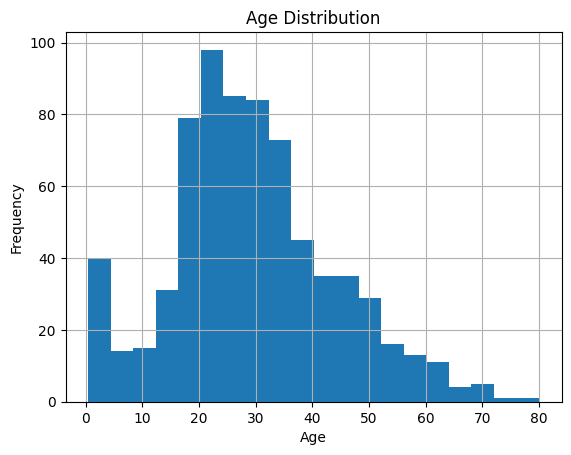

In [7]:
# Grouping and computing mean for a column
mean_age = df.groupby('Pclass')['Age'].mean().compute()
print(f"\nMean Age by Passenger Class:\n{mean_age}")

# Visualizing data (requires computation)
df['Age'].compute().hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



--- 2. Dask Arrays ---

Array Mean (computed lazily): dask.array<mean_agg-aggregate, shape=(10000,), dtype=float64, chunksize=(1000,), chunktype=numpy.ndarray>

Computed Array Mean (first 10 values): [0.49862425 0.50163252 0.50203343 0.49860099 0.50471765 0.49924389
 0.50105553 0.50188164 0.50296528 0.50250131]


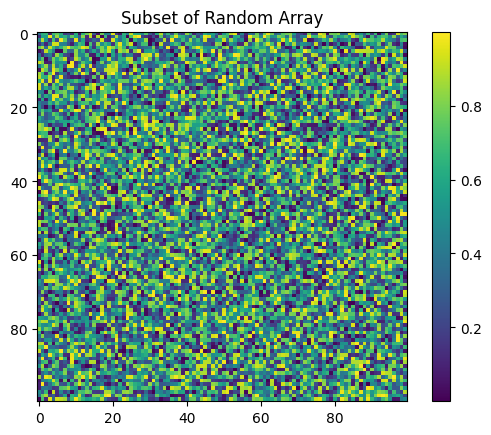

In [8]:
# 2. Exploring Dask Arrays
print("\n--- 2. Dask Arrays ---")

# Create a large Dask array
x = da.random.random((10000, 10000), chunks=(1000, 1000))

# Perform operations
result = x.mean(axis=0)
print("\nArray Mean (computed lazily):", result)

# Compute the result
computed_result = result.compute()
print("\nComputed Array Mean (first 10 values):", computed_result[:10])

# Visualize a subset of the array
plt.imshow(x[:100, :100].compute(), cmap='viridis')
plt.colorbar()
plt.title("Subset of Random Array")
plt.show()


In [48]:
# 3. Exploring Dask Bags (Unstructured data)
print("\n--- 3. Dask Bags ---")

# Create a Dask bag from a text file or iterable
bag = db.from_sequence(['apple', 'banana', 'carrot', 'apple', 'banana', 'apple'], npartitions=1)

# Perform map and reduce operations
bag_counts = bag.map(lambda x: (x, 1)).foldby(lambda x: x[0], lambda acc, x: acc + 1, initial=0)
print("\nWord Counts:", bag_counts.compute())


--- 3. Dask Bags ---

Word Counts: [('apple', 3), ('banana', 2), ('carrot', 1)]


In [50]:
from dask_ml.datasets import make_classification
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [51]:
# 4. Machine Learning with Dask-ML
print("\n--- 4. Dask-ML ---")
# Generate synthetic data
X, y = make_classification(n_samples=100000, n_features=10, chunks=10000, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test.compute(), y_pred.compute())
print(f"\nModel Accuracy: {accuracy:.2f}")


--- 4. Dask-ML ---


d:\anaconda\envs\venv\Lib\site-packages\dask\base.py:1103: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(



Model Accuracy: 0.67


In [4]:
# 5. Using Dask Delayed for Custom Parallel Workflows
print("\n--- 5. Dask Delayed ---")

from dask import delayed

# Define a delayed function
@delayed
def add(x, y):
    return x + y

@delayed
def multiply(x, y):
    return x * y

@delayed
def sum_list(values):
    return sum(values)

# Build a computation graph
a = add(1, 2)
b = multiply(3, 4)
c = add(a, b)
result = sum_list([a, b, c])

print("\nDask Delayed Result (Lazy):", result)
computed_result = result.compute()
print("Computed Result:", computed_result)



--- 5. Dask Delayed ---

Dask Delayed Result (Lazy): Delayed('sum_list-27d86bab-d086-4779-963f-a812636d9c4b')
Computed Result: 30


In [16]:
# 6. Visualizing Dask Computation Graphs
print("\n--- 6. Visualization ---")

# Visualize a Dask computation graph (requires graphviz)
result.visualize(filename='dask_graph', format='json')
print("Computation graph saved as 'dask_graph.png'.")

# 7. Scaling with Dask Clusters
print("\n--- 7. Scaling with Dask ---")
print("You can use Dask's distributed capabilities to scale this code to a cluster!")

# Shut down the Dask client
client.close()



--- 6. Visualization ---
Computation graph saved as 'dask_graph.png'.

--- 7. Scaling with Dask ---
You can use Dask's distributed capabilities to scale this code to a cluster!


## **Dask vs Pandas**

In [21]:
import pandas as pd
import dask.dataframe as dd
import time
import numpy as np
import os

In [28]:
# Generate a large CSV file (if not already available)
large_csv = "large_dataset.csv"
rows = 100_000_000
if not os.path.exists(large_csv):
    print("Generating a large dataset...")
    data = {
        "id": np.arange(rows),
        "value": np.random.rand(rows),
        "category": np.random.choice(["A", "B", "C"], size=rows),
    }
    df = pd.DataFrame(data)
    df.to_csv(large_csv, index=False)


In [30]:
# 1. Comparing Loading Time
print("\n--- 1. Comparing Loading Time ---")

# Pandas
start = time.time()
pandas_df = pd.read_csv(large_csv)
pandas_load_time = time.time() - start
print(f"Pandas Loading Time: {pandas_load_time:.2f} seconds")

# Dask
start = time.time()
dask_df = dd.read_csv(large_csv)
dask_load_time = time.time() - start
print(f"Dask Loading Time (Lazy): {dask_load_time:.2f} seconds")


--- 1. Comparing Loading Time ---
Pandas Loading Time: 2.94 seconds
Dask Loading Time (Lazy): 0.00 seconds


In [31]:
# 2. Comparing Aggregations
print("\n--- 2. Comparing Aggregations ---")

# Pandas
start = time.time()
pandas_agg = pandas_df.groupby("category")["value"].mean()
pandas_agg_time = time.time() - start
print(f"Pandas Aggregation Time: {pandas_agg_time:.2f} seconds")
print("Pandas Aggregation Result:")
print(pandas_agg)

# Dask
start = time.time()
dask_agg = dask_df.groupby("category")["value"].mean().compute()
dask_agg_time = time.time() - start
print(f"Dask Aggregation Time: {dask_agg_time:.2f} seconds")
print("Dask Aggregation Result:")
print(dask_agg)


--- 2. Comparing Aggregations ---
Pandas Aggregation Time: 0.40 seconds
Pandas Aggregation Result:
category
A    0.499979
B    0.499692
C    0.499726
Name: value, dtype: float64
Dask Aggregation Time: 1.63 seconds
Dask Aggregation Result:
category
A    0.499979
B    0.499692
C    0.499726
Name: value, dtype: float64


In [32]:
# 3. Comparing Filtering Operations
print("\n--- 3. Comparing Filtering Operations ---")

# Pandas
start = time.time()
pandas_filter = pandas_df[pandas_df["value"] > 0.5]
pandas_filter_time = time.time() - start
print(f"Pandas Filtering Time: {pandas_filter_time:.2f} seconds")

# Dask
start = time.time()
dask_filter = dask_df[dask_df["value"] > 0.5].compute()
dask_filter_time = time.time() - start
print(f"Dask Filtering Time: {dask_filter_time:.2f} seconds")


--- 3. Comparing Filtering Operations ---
Pandas Filtering Time: 0.13 seconds
Dask Filtering Time: 1.30 seconds


In [33]:

# 4. Memory Usage
print("\n--- 4. Comparing Memory Usage ---")
import sys

pandas_memory = pandas_df.memory_usage(deep=True).sum() / 1024**2
dask_memory = dask_df.memory_usage(deep=True).sum().compute() / 1024**2

print(f"Pandas Memory Usage: {pandas_memory:.2f} MB")
print(f"Dask Memory Usage (calculated lazily): {dask_memory:.2f} MB")

# 5. Observations
print("\n--- Observations ---")
print("1. Pandas is faster for small datasets but struggles with larger datasets due to memory constraints.")
print("2. Dask scales better for larger datasets by leveraging parallelism and lazy computation.")



--- 4. Comparing Memory Usage ---
Pandas Memory Usage: 629.43 MB
Dask Memory Usage (calculated lazily): 629.43 MB

--- Observations ---
1. Pandas is faster for small datasets but struggles with larger datasets due to memory constraints.
2. Dask scales better for larger datasets by leveraging parallelism and lazy computation.


# **Dask vs PsSpark**

**Dask** and **PySpark** are both tools for distributed computing, but they are designed with slightly different use cases and strengths. Here's a detailed comparison of **Dask** and **PySpark** to help you decide which is better suited for your specific needs.

---

### **1. General Overview**
| Feature         | **Dask**                                           | **PySpark**                                        |
|------------------|----------------------------------------------------|---------------------------------------------------|
| **Main Purpose** | Parallel computing for Python, extends existing libraries like Pandas, NumPy, and Scikit-learn. | Big data processing, optimized for massive datasets, built on the Hadoop ecosystem. |
| **Programming Model** | Python-native, tightly integrated with Python's ecosystem. | Based on the Spark engine, supports SQL, streaming, and machine learning. |
| **Ease of Use**  | Python-like APIs; easier for Python developers to pick up. | Requires learning Spark APIs; supports multiple languages. |
| **Installation** | Lightweight and Python-only, easy to set up locally. | Heavier, requires JVM and Hadoop/Spark cluster setup. |

---

### **2. Architecture**
| Feature            | **Dask**                                       | **PySpark**                                        |
|---------------------|------------------------------------------------|---------------------------------------------------|
| **Execution**       | Dynamic task graphs, lazy evaluation like Spark but more lightweight. | DAG (Directed Acyclic Graph) for task scheduling, heavily optimized for large-scale cluster computing. |
| **Cluster Manager** | Can integrate with Kubernetes, SLURM, or standalone setups. | Integrates with Hadoop/YARN, Mesos, Kubernetes, or Spark's standalone cluster manager. |
| **Parallelism**     | Thread-based, process-based, or distributed on a cluster. | Distributed, designed for clusters. |
| **Scalability**     | Scales well for medium to large datasets.       | Built for massive-scale datasets (petabytes). |

---

### **3. Performance**
| Feature             | **Dask**                                       | **PySpark**                                        |
|----------------------|------------------------------------------------|---------------------------------------------------|
| **Dataset Size**     | Handles datasets larger than memory but works best for datasets <1TB. | Optimized for extremely large datasets (>1TB, petabyte scale). |
| **Speed**            | Faster for smaller datasets due to minimal overhead. | Better for extremely large datasets where cluster optimization is critical. |
| **Latency**          | Lower latency for smaller jobs.                | Higher initial latency due to JVM and cluster startup overhead. |

---

### **4. APIs and Ecosystem**
| Feature             | **Dask**                                       | **PySpark**                                        |
|----------------------|------------------------------------------------|---------------------------------------------------|
| **DataFrame API**    | Similar to Pandas; integrates well with Python libraries. | Spark DataFrame API, SQL-like operations.         |
| **Machine Learning** | Dask-ML for distributed ML (not as mature as Spark). | MLlib: A mature library for distributed machine learning. |
| **Streaming**        | Limited streaming capabilities.                | Spark Streaming for real-time data processing.    |
| **SQL Queries**      | Limited SQL support via third-party libraries. | Strong SQL support with Spark SQL.                |

---

### **5. Setup and Deployment**
| Feature             | **Dask**                                       | **PySpark**                                        |
|----------------------|------------------------------------------------|---------------------------------------------------|
| **Setup**            | Simple: Install with `pip install dask`.       | Heavier setup: Requires Java, Hadoop, and Spark cluster. |
| **Integration**      | Python-first, integrates with tools like Pandas, NumPy, and Scikit-learn. | Integrates with Hadoop ecosystem, databases, and enterprise tools. |
| **Deployment**       | Local machines or Kubernetes clusters.         | Designed for clusters (e.g., AWS EMR, Databricks, on-premises clusters). |

---

### **6. When to Use**
#### **Dask**
- You’re working within the Python ecosystem (e.g., Pandas, NumPy, Scikit-learn).
- Your dataset is medium to large (up to 1TB).
- You prefer a lightweight, easy-to-install solution.
- You need flexible parallelism without relying on a full cluster.
- Use cases:
  - Data preprocessing.
  - Machine learning pipelines with Scikit-learn/Dask-ML.
  - Scientific computing.

#### **PySpark**
- Your data exceeds 1TB or fits within a Hadoop ecosystem.
- You’re working with structured or semi-structured data requiring SQL or large-scale ETL processes.
- You need a robust, enterprise-grade solution for distributed data processing.
- Use cases:
  - Big data processing and ETL.
  - Real-time streaming.
  - Large-scale machine learning with Spark MLlib.

---

### **Conclusion**

| Use Case                  | **Recommended Tool** |
|---------------------------|-----------------------|
| Medium datasets (<1TB)    | **Dask**             |
| Extremely large datasets  | **PySpark**          |
| Python-first environment  | **Dask**             |
| Hadoop ecosystem          | **PySpark**          |
| Real-time streaming        | **PySpark**          |
| Fast setup and iteration   | **Dask**             |

Both tools are excellent, but the choice depends on the scale of your data and your workflow requirements. Let me know if you’d like deeper insights into either tool!